In [1]:
import torch
from torch import nn
from hcpdiff.loss import EDMLoss, SSIMLoss, GWLoss  # Replace 'your_module_name' with the actual module name where MinSNRLoss is defined

class CombinedLoss(nn.Module):
    def __init__(self, edm_weight=1.0, ssim_weight=10, gw_weight=0.0005, gamma=1.0,**kwargs):
        super(CombinedLoss, self).__init__()
        self.need_sigma = True
        self.edm_loss = EDMLoss(gamma=gamma, **kwargs)
        
        self.ssim_loss = SSIMLoss( **kwargs)
        self.gw_loss = GWLoss(**kwargs)

        self.edm_weight = edm_weight
        self.ssim_weight = ssim_weight
        self.gw_weight = gw_weight

    def forward(self, input: torch.Tensor, target: torch.Tensor, sigma: torch.Tensor) -> torch.Tensor: # input: latent target: latent sigma [b,64,64,64]
        edm_loss = self.edm_loss(input, target, sigma)
        ssim_loss = self.ssim_loss(input, target)
        gw_loss = self.gw_loss(input, target)

        # Combine losses with weights
        combined_loss = (
            self.edm_weight * edm_loss.mean() +  # [20, 64, 64, 64]
            self.gw_weight * gw_loss.mean() +
            self.ssim_weight * ssim_loss.mean()
        )
        print(self.edm_weight * edm_loss.mean(),self.gw_weight * gw_loss.mean(),self.ssim_weight * ssim_loss.mean())
        return combined_loss

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# 加载保存的 input、target 和 sigma
inputs = torch.load('/home/linjw/Innoverse/HCP-Diffusion/test/input_tensor.pt').cpu()
target = torch.load('/home/linjw/Innoverse/HCP-Diffusion/test/target_tensor.pt').cpu()
sigma = torch.load('/home/linjw/Innoverse/HCP-Diffusion/test/sigma_tensor.pt').cpu()



In [3]:
CombinedLoss()(inputs,target,sigma)

tensor(13.9741, grad_fn=<MulBackward0>) tensor(4.6646, grad_fn=<MulBackward0>) tensor(7.8663, grad_fn=<MulBackward0>)


tensor(26.5050, grad_fn=<AddBackward0>)

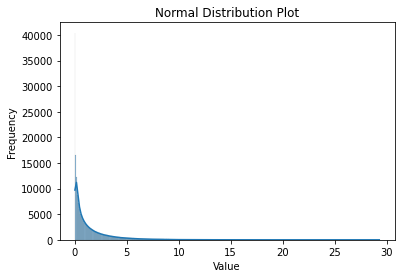

In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# 生成形状为 (64, 64, 64) 的随机张量
tensor = edm_loss[1].detach()

# 将张量展平以绘制直方图
flat_tensor = tensor.view(-1).numpy()

# 使用 seaborn 绘制直方图
sns.histplot(flat_tensor, kde=True)

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Plot')
# 显示图形
plt.show()


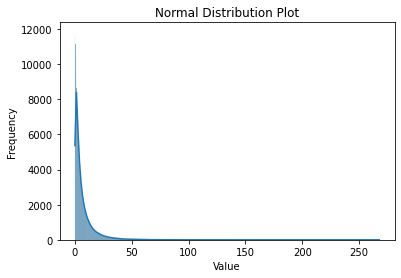

In [9]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
# 生成形状为 (64, 64, 64) 的随机张量
tensor = gw_loss[1].detach()

# 将张量展平以绘制直方图
flat_tensor = tensor.view(-1).numpy()

# 使用 seaborn 绘制直方图
sns.histplot(flat_tensor, kde=True)

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Plot')


# 显示图形
plt.show()


In [10]:
7000/(2.5*1e6)

0.0028

In [11]:
1000/(0.3*1e6
      )

0.0033333333333333335